# Work Status Classification (Private vs. Public vs. No Income)

In [1]:
# import packages
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(16)

In [2]:
# load demographics data from local folder as demo_df dataframe
csv_file = "~/IDC5210_Machine_Learning/Project/Translated_data/demographics_w_regions.csv"
demo_df = pd.read_csv(csv_file)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      103202 non-null  int64  
 1   field_1         103202 non-null  int64  
 2   Cust_ID         103202 non-null  int64  
 3   Cust_Segment    103202 non-null  object 
 4   Branch_ID       103202 non-null  int64  
 5   Branch_Y        103202 non-null  float64
 6   Branch_X        103202 non-null  float64
 7   Home_Loc_Y      103198 non-null  float64
 8   Home_Loc_X      103198 non-null  float64
 9   Work_Loc_Y      103202 non-null  float64
 10  Work_Loc_X      103202 non-null  float64
 11  Gender          103202 non-null  object 
 12  Marital_Status  103202 non-null  object 
 13  Education_Lv    103202 non-null  object 
 14  Job_Status      103202 non-null  object 
 15  Income          100752 non-null  float64
 16  Age             103202 non-null  int64  
 17  Years_w_Ba

In [3]:
# drop unnecessary columns and view number of non-null entries in each column
demo_df.drop(["Unnamed: 0", "field_1", "Branch_X", "Branch_Y", "Home_Loc_X", "Home_Loc_Y", "Work_Loc_X", "Work_Loc_Y"], axis = 1, inplace=True)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Cust_ID         103202 non-null  int64  
 1   Cust_Segment    103202 non-null  object 
 2   Branch_ID       103202 non-null  int64  
 3   Gender          103202 non-null  object 
 4   Marital_Status  103202 non-null  object 
 5   Education_Lv    103202 non-null  object 
 6   Job_Status      103202 non-null  object 
 7   Income          100752 non-null  float64
 8   Age             103202 non-null  int64  
 9   Years_w_Bank    103197 non-null  float64
 10  Penalty_201407  103202 non-null  object 
 11  Penalty_201408  103202 non-null  object 
 12  Penalty_201409  103202 non-null  object 
 13  Penalty_201410  103202 non-null  object 
 14  Penalty_201411  103202 non-null  object 
 15  Penalty_201412  103202 non-null  object 
 16  Penalty_201501  103202 non-null  object 
 17  Penalty_20

In [4]:
# in the raw data, columns 10 to 21 describe the delinquency status
# of the customers' accounts in the period from July 2014 to April 2015
# this code block reclassifies that data by counting the number of times
# the accounts have fallen into each delinquency category in that time period
# NaNs are replaced with 0s

delq_counts = demo_df.iloc[:,10:22].apply(pd.Series.value_counts, axis=1)
delq_counts = delq_counts.fillna(0)

In [5]:
delq_counts

,.,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,1.0,5.0,5.0,0.0,1.0,0.0,0.0
1,0.0,7.0,5.0,0.0,0.0,0.0,0.0
2,0.0,10.0,0.0,0.0,2.0,0.0,0.0
3,0.0,5.0,1.0,0.0,1.0,2.0,3.0
4,0.0,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
103197,0.0,12.0,0.0,0.0,0.0,0.0,0.0
103198,0.0,9.0,3.0,0.0,0.0,0.0,0.0
103199,8.0,4.0,0.0,0.0,0.0,0.0,0.0
103200,0.0,12.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# join delinquency counts to demographics data frame

demo_df = demo_df.join(delq_counts)
demo_df

,Cust_ID,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,...,Work_Region,Home_Region,Branch_Region,.,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,25139695,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),2500.0,55,2.0,...,MARMARA,MEDITERRANEAN,MEDITERRANEAN,1.0,5.0,5.0,0.0,1.0,0.0,0.0
1,21213035,BİREYSEL,2,E,BİLINMİYOR,LİSE,ÜCRETLİ (ÖZEL),2500.0,24,4.0,...,MARMARA,MEDITERRANEAN,MEDITERRANEAN,0.0,7.0,5.0,0.0,0.0,0.0,0.0
2,23187800,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),850.0,39,3.0,...,MARMARA,MARMARA,MEDITERRANEAN,0.0,10.0,0.0,0.0,2.0,0.0,0.0
3,16400475,BİREBİR,2,E,EVLİ,ÜNİVERSİTE,SERBEST MESLEK,NaN,45,8.0,...,MARMARA,MARMARA,MEDITERRANEAN,0.0,5.0,1.0,0.0,1.0,2.0,3.0
4,17303354,BİREYSEL,2,E,EVLİ,LİSE,ÜCRETLİ (ÖZEL),3500.0,35,7.0,...,MARMARA,MEDITERRANEAN,MEDITERRANEAN,0.0,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103197,9274456,BİREBİR,1228,E,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),0.0,54,13.0,...,MEDITERRANEAN,MARMARA,MEDITERRANEAN,0.0,12.0,0.0,0.0,0.0,0.0,0.0
103198,9316496,BİREYSEL,1261,E,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),1044.0,31,13.0,...,MARMARA,MARMARA,MARMARA,0.0,9.0,3.0,0.0,0.0,0.0,0.0
103199,25988134,BİREYSEL,1308,E,BEKAR,LİSE,ÜCRETLİ (ÖZEL),1600.0,20,1.0,...,MARMARA,MARMARA,MARMARA,8.0,4.0,0.0,0.0,0.0,0.0,0.0
103200,7745674,BİREYSEL,1359,K,EVLİ,ÜNİVERSİTE,ÜCRETLİ (ÖZEL),0.0,35,14.0,...,MEDITERRANEAN,MARMARA,MEDITERRANEAN,0.0,12.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# drop original delinquency columns

demo_df.drop(['.','Penalty_201407', 'Penalty_201408', 'Penalty_201409', 
                  'Penalty_201410', 'Penalty_201411', 'Penalty_201412', 'Penalty_201501',
                  'Penalty_201502', 'Penalty_201503', 'Penalty_201504', 'Penalty_201505', 
                  'Penalty_201506'], axis = 1, inplace=True)

In [8]:
# group the following job designations together in the following classes

demo_df.replace(to_replace=['ÜCRETLİ (ÖZEL)', 'SERBEST MESLEK', 'ÇALIŞAN EMEKLİ(SERBEST MESLEK)'], value = 'PRIVATE', inplace=True)
demo_df.replace(to_replace=['ÇALIŞAN EMEKLİ(ÜCRETLİ)', 'ÜCRETLI (KAMU)'], value= 'PUBLIC', inplace = True)
demo_df.replace(to_replace=['EMEKLİ', 'ÇALIŞMIYOR', 'EV HANIMI', 'ÖĞRENCİ', 'ÇOCUK (18 YAŞIN ALTINDA)'], value= 'UNEMPLOYED', inplace = True)

In [9]:
demo_df

,Cust_ID,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,Home_Region,Branch_Region,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,4)GECIKME 30-59 GUN,5)GECIKME 60+ GUN,6)TAKIP
0,25139695,BİREYSEL,2,E,EVLİ,LİSE,PRIVATE,2500.0,55,2.0,MARMARA,MEDITERRANEAN,MEDITERRANEAN,5.0,5.0,0.0,1.0,0.0,0.0
1,21213035,BİREYSEL,2,E,BİLINMİYOR,LİSE,PRIVATE,2500.0,24,4.0,MARMARA,MEDITERRANEAN,MEDITERRANEAN,7.0,5.0,0.0,0.0,0.0,0.0
2,23187800,BİREYSEL,2,E,EVLİ,LİSE,PRIVATE,850.0,39,3.0,MARMARA,MARMARA,MEDITERRANEAN,10.0,0.0,0.0,2.0,0.0,0.0
3,16400475,BİREBİR,2,E,EVLİ,ÜNİVERSİTE,PRIVATE,NaN,45,8.0,MARMARA,MARMARA,MEDITERRANEAN,5.0,1.0,0.0,1.0,2.0,3.0
4,17303354,BİREYSEL,2,E,EVLİ,LİSE,PRIVATE,3500.0,35,7.0,MARMARA,MEDITERRANEAN,MEDITERRANEAN,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103197,9274456,BİREBİR,1228,E,EVLİ,ÜNİVERSİTE,PRIVATE,0.0,54,13.0,MEDITERRANEAN,MARMARA,MEDITERRANEAN,12.0,0.0,0.0,0.0,0.0,0.0
103198,9316496,BİREYSEL,1261,E,EVLİ,ÜNİVERSİTE,PRIVATE,1044.0,31,13.0,MARMARA,MARMARA,MARMARA,9.0,3.0,0.0,0.0,0.0,0.0
103199,25988134,BİREYSEL,1308,E,BEKAR,LİSE,PRIVATE,1600.0,20,1.0,MARMARA,MARMARA,MARMARA,4.0,0.0,0.0,0.0,0.0,0.0
103200,7745674,BİREYSEL,1359,K,EVLİ,ÜNİVERSİTE,PRIVATE,0.0,35,14.0,MEDITERRANEAN,MARMARA,MEDITERRANEAN,12.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Load in transactions data

csv_file2 = "~/IDC5210_Machine_Learning/Project/Translated_data/transactions(SU_ORNEKLEM_KK_HAR_BILGI).csv"
transactions = pd.read_csv(csv_file2, dtype={'Category': 'str'})
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334625 entries, 0 to 9334624
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Cust_ID         int64  
 2   Trans_Data      object 
 3   Trans_Time      object 
 4   Trans_Amt       float64
 5   Category        object 
 6   Merchant_ID     int64  
 7   Online_Trans    int64  
 8   Trans_Type      object 
 9   Trans_Currency  object 
 10  X               float64
 11  Y               float64
dtypes: float64(3), int64(4), object(5)
memory usage: 854.6+ MB


In [11]:
# select on the columns below

trans_sub = transactions[['Cust_ID', 'Category', 'Trans_Amt', 'Online_Trans']]
trans_sub

,Cust_ID,Category,Trans_Amt,Online_Trans
0,11861396,RESTORAN,10.57,0
1,13667756,RESTORAN,82.00,0
2,11024865,RESTORAN,15.00,0
3,10922788,RESTORAN,86.00,0
4,10335987,RESTORAN,30.00,0
...,...,...,...,...
9334620,15623192,GIDA,23.50,0
9334621,16382137,TEKSTİL,115.00,0
9334622,16808133,HİZMET SEKTÖRLERİ,32.00,0
9334623,27012943,TEKSTİL,250.00,0


In [12]:
# convert the classes in the transactions 'Category' column into their own column headings, grouped by 'Cust_ID', and with transaction amounts summed for each class

trans_sums = trans_sub.groupby(['Cust_ID', 'Category'])['Trans_Amt'].sum().reset_index()
trans_cats = trans_sums.pivot(columns='Category', index='Cust_ID', values='Trans_Amt')
trans_cats = trans_cats.fillna(0)

In [13]:
trans_cats

Category,AKARYAKIT,ALIŞVERİŞ MERKEZLERİ,ARABA KİRALAMA,AYAKKABI,BEYAZ EŞYA,"DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM",DOĞRUDAN PAZARLAMA-MAIL ORDER,DİĞER,EĞLENCE VE SPOR,EĞİTİM,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1560993,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0
1566513,2170.00,20.05,0.0,0.00,250.0,0.0,0.0,268.50,0.0,0.0,...,0.00,0.00,0.0,858.00,0.0,2238.76,0.00,1375.0,1928.13,0.0
1567711,375.32,0.00,0.0,558.40,55.0,0.0,0.0,350.92,0.0,0.0,...,716.87,89.90,0.0,465.39,0.0,77.57,5587.22,912.6,64.93,70.0
1569761,0.00,0.00,0.0,459.87,0.0,0.0,0.0,0.00,0.0,0.0,...,1590.00,59.99,0.0,0.00,0.0,8797.33,1319.34,0.0,3026.21,0.0
1569938,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,379.00,19.90,840.0,74.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196275,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,55.25,0.00,0.0,0.00,0.0
28196280,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,229.90,0.0
28200516,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,5338.26,0.00,0.0,0.00,0.0


In [14]:
# join the two datasets on customer ID, then drop Cust_ID

demo_df = demo_df.join(trans_cats, on='Cust_ID')

In [15]:
demo_df.drop('Cust_ID', axis = 1, inplace = True)

In [16]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 53 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Cust_Segment                            103202 non-null  object 
 1   Branch_ID                               103202 non-null  int64  
 2   Gender                                  103202 non-null  object 
 3   Marital_Status                          103202 non-null  object 
 4   Education_Lv                            103202 non-null  object 
 5   Job_Status                              103202 non-null  object 
 6   Income                                  100752 non-null  float64
 7   Age                                     103202 non-null  int64  
 8   Years_w_Bank                            103197 non-null  float64
 9   Work_Region                             103202 non-null  object 
 10  Home_Region                             1031

## Data Exploration

In [17]:
# check demographic category counts

demo_df['Cust_Segment'].value_counts()

BİREYSEL                       96149
BİREBİR                         4000
MİKRO                           2830
EXI26                            130
ÖZEL BANKACILIK MÜŞTERİLERİ       93
Name: Cust_Segment, dtype: int64

In [18]:
demo_df['Marital_Status'].value_counts()

EVLİ                65637
BEKAR               30877
BOŞANMIŞ             4831
BİLINMİYOR           1397
DUL                   457
EVLİLİĞİN İPTALİ        3
Name: Marital_Status, dtype: int64

In [19]:
demo_df['Education_Lv'].value_counts()

LİSE          46808
ÜNİVERSİTE    26854
ORTAOKUL       8735
YÜKSEKOKUL     8090
İLKOKUL        7583
LİSANSÜSTÜ     3520
EĞİTİMSİZ      1312
DOKTORA         217
BİLİNMİYOR       83
Name: Education_Lv, dtype: int64

In [20]:
demo_df['Job_Status'].value_counts()

PRIVATE                90114
PUBLIC                  7339
UNEMPLOYED              5061
DİĞER                    455
TANIMSIZ                 225
YURTDIŞINDA ÇALIŞAN        8
Name: Job_Status, dtype: int64

In [21]:
demo_df['Home_Region'].value_counts()

MARMARA             100587
BLACK SEA              671
CENTRAL ANATOLIA       494
MEDITERRANEAN          468
AEGEAN                 377
EASTERN ANATOLIA       333
SE ANATOLIA            268
Name: Home_Region, dtype: int64

In [22]:
demo_df['Work_Region'].value_counts()

MARMARA             101824
CENTRAL ANATOLIA       353
AEGEAN                 316
BLACK SEA              255
MEDITERRANEAN          200
EASTERN ANATOLIA       144
SE ANATOLIA            110
Name: Work_Region, dtype: int64

In [23]:
demo_df['Branch_Region'].value_counts()

MARMARA             98475
BLACK SEA            1118
CENTRAL ANATOLIA     1100
AEGEAN               1089
MEDITERRANEAN         713
EASTERN ANATOLIA      380
SE ANATOLIA           323
Name: Branch_Region, dtype: int64

In [24]:
# check values for nulls
demo_df.isnull().sum(axis = 0)

Cust_Segment                                 0
Branch_ID                                    0
Gender                                       0
Marital_Status                               0
Education_Lv                                 0
Job_Status                                   0
Income                                    2450
Age                                          0
Years_w_Bank                                 5
Work_Region                                  0
Home_Region                                  4
Branch_Region                                4
1)RISKSIZ                                    0
2)GECIKME 1-15 GUN                           0
3)GECIKME 16-29 GUN                          0
4)GECIKME 30-59 GUN                          0
5)GECIKME 60+ GUN                            0
6)TAKIP                                      0
AKARYAKIT                                 1345
ALIŞVERİŞ MERKEZLERİ                      1345
ARABA KİRALAMA                            1345
AYAKKABI     

In [25]:
demo_df[demo_df['DİĞER'].isnull()]
#looks like these customers didn't have transaction data or did not use their credit cards

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
138,BİREYSEL,4,E,EVLİ,ÜNİVERSİTE,PRIVATE,1700.0,29,8.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,MİKRO,4,E,BİLINMİYOR,ÜNİVERSİTE,PRIVATE,25000.0,36,13.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,BİREYSEL,4,K,BOŞANMIŞ,LİSE,PRIVATE,1215.0,31,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,BİREYSEL,7,E,EVLİ,LİSE,PRIVATE,2300.0,40,14.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,BİREYSEL,13,E,EVLİ,LİSE,PRIVATE,2000.0,38,7.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102793,BİREYSEL,685,E,BEKAR,ÜNİVERSİTE,PUBLIC,0.0,24,1.0,AEGEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102835,BİREYSEL,822,E,EVLİ,LİSE,PRIVATE,1500.0,25,6.0,AEGEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103008,BİREYSEL,232,E,BEKAR,YÜKSEKOKUL,PRIVATE,2500.0,25,4.0,BLACK SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103063,BİREYSEL,532,E,EVLİ,LİSE,PRIVATE,1000.0,37,6.0,BLACK SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# drop rows with NaN values in the "AKARYAKIT" column, which has NaN values for all other spending categories
demo_df.dropna(subset=["AKARYAKIT"], inplace=True)

# drop rows with NaN values in the "Home Region" and "Branch Region" columns
# these rows made up only a small part of the data set
demo_df.dropna(subset=["Home_Region"], inplace=True)
demo_df.dropna(subset=["Branch_Region"], inplace=True)

In [27]:
# drop rows with the following values in the 'Job Status' column because they don't fit into the classification framework

demo_df.drop(demo_df[demo_df['Job_Status'] == 'ÇOCUK (18 YAŞIN ALTINDA)'].index, inplace = True)
demo_df.drop(demo_df[demo_df['Job_Status'] == 'YURTDIŞINDA ÇALIŞAN'].index, inplace = True)                     
demo_df.drop(demo_df[demo_df['Job_Status'] == 'TANIMSIZ'].index, inplace = True)        
demo_df.drop(demo_df[demo_df['Job_Status'] == 'DİĞER'].index, inplace = True)        

In [28]:
# classes left over in the 'Job Status' column and their value counts

demo_df['Job_Status'].value_counts()

PRIVATE       88953
PUBLIC         7218
UNEMPLOYED     4998
Name: Job_Status, dtype: int64

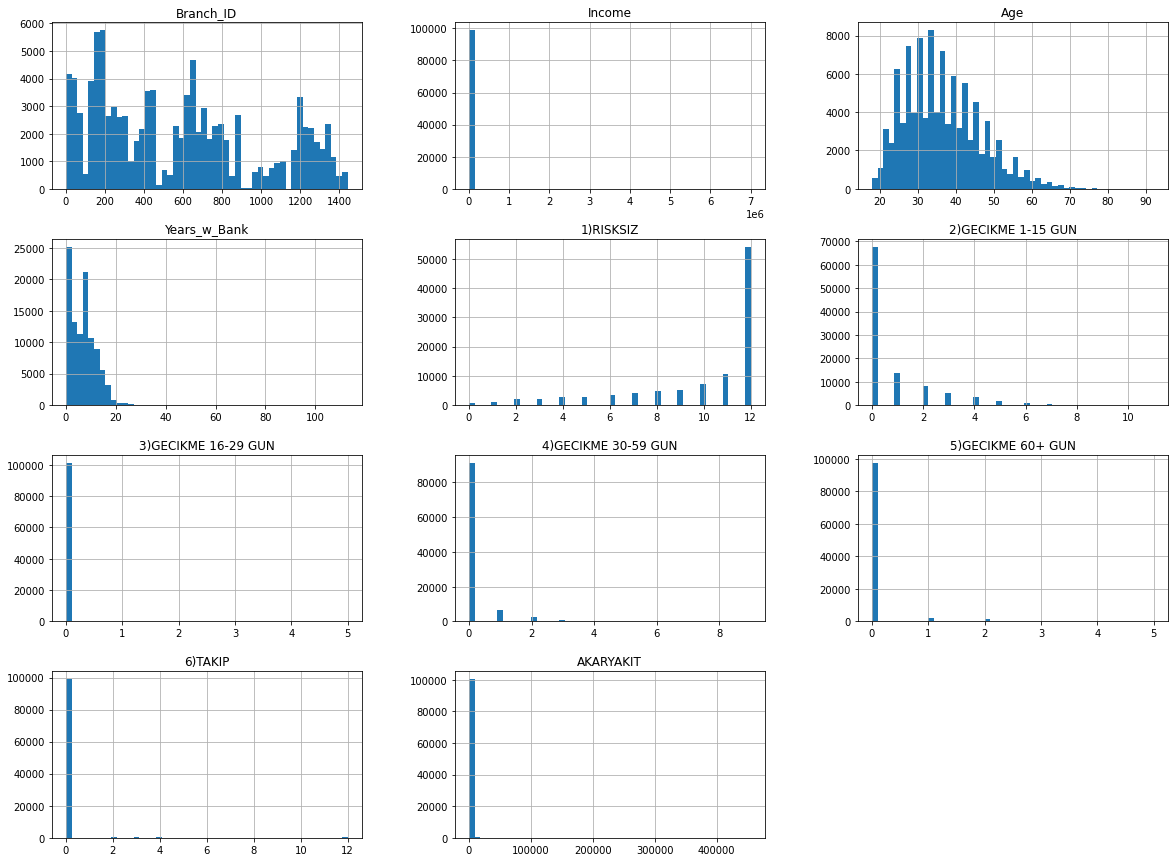

In [29]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
demo_df.iloc[:,0:19].hist(bins=50, figsize=(20,15))
plt.show()

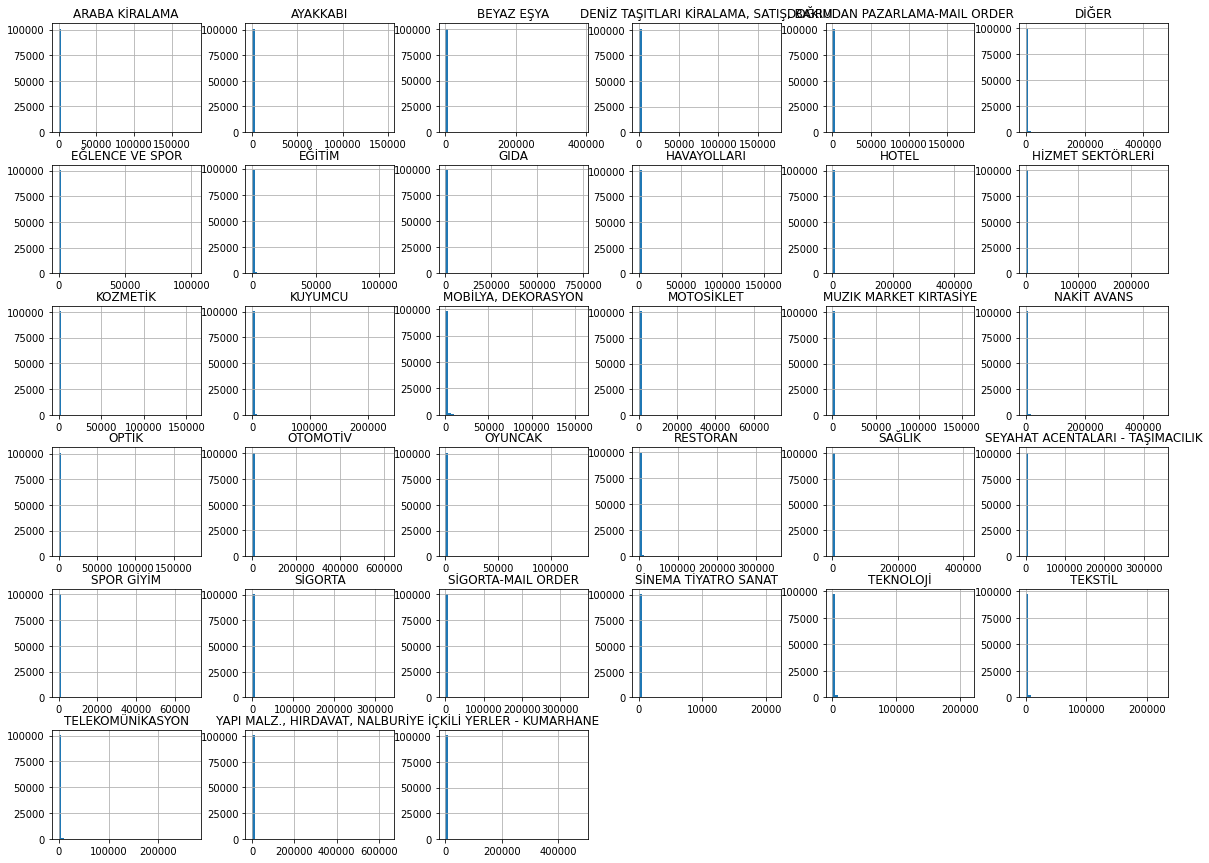

In [30]:
demo_df.iloc[:,20:].hist(bins=50, figsize=(20,15))
plt.show()
# all transaction categories had low amounts of spending in most of the accounts
# with a few large outliers

In [31]:
# all features in data set used to build the classification model
demo_df.columns.values

array(['Cust_Segment', 'Branch_ID', 'Gender', 'Marital_Status',
       'Education_Lv', 'Job_Status', 'Income', 'Age', 'Years_w_Bank',
       'Work_Region', 'Home_Region', 'Branch_Region', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALARI - TAŞIMACILIK', 'SPOR GİYİM', 'SİGORTA',
       'SİGORTA-MAIL ORDER', 'SİNEMA TİYATRO SANAT', 'TEKNOLOJİ',
       'TEKSTİL', 'TELEKOMÜNİKASYON', 'YAPI MALZ., HIRDAVAT, NALBURİYE',
       'İÇKİLİ YERLER - KUM

## Data Processing

In [32]:
# train/test split - stratified shuffle split used because of the imbalance
# in the number of customers in the employment sectors
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(demo_df, demo_df["Job_Status"]):
    train_set = demo_df.iloc[train_index]
    test_set = demo_df.iloc[test_index]

In [33]:
# separate labels from feature matrix

train_y = train_set['Job_Status']
train_X = train_set.drop('Job_Status', axis = 1)
test_y = test_set['Job_Status']
test_X = test_set.drop('Job_Status', axis = 1)

In [34]:
# build transformation pipeline

# numerical features will have missing values imputed using median values
# and will be standardized with mean at default value of zero

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler())
])

In [35]:
# one hot encode categorical features

from sklearn.preprocessing import OneHotEncoder

cat_pipeline  = Pipeline([
('cat_encoder', OneHotEncoder())
])

In [36]:
# assemble full pipeline

from sklearn.compose import ColumnTransformer
num_attribs = ['Branch_ID', 'Income', 'Age', 'Years_w_Bank', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALARI - TAŞIMACILIK', 'SPOR GİYİM', 'SİGORTA',
       'SİGORTA-MAIL ORDER', 'SİNEMA TİYATRO SANAT', 'TEKNOLOJİ',
       'TEKSTİL', 'TELEKOMÜNİKASYON', 'YAPI MALZ., HIRDAVAT, NALBURİYE',
       'İÇKİLİ YERLER - KUMARHANE']
cat_attribs = ['Cust_Segment', 'Gender', 'Marital_Status', 'Education_Lv', 'Work_Region', 'Home_Region', 'Branch_Region']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs), 
], remainder = 'passthrough')

In [37]:
# training set fed through the transformation pipeline

train_X_prepared = full_pipeline.fit_transform(train_X)

## Dimensionality Reduction

In [39]:
# reduce the column count down to those only pertinent and not collinear for working status classification
from sklearn.decomposition import TruncatedSVD

TruncSVD = TruncatedSVD(n_components = 86)
TruncSVD.fit(train_X_prepared)
cumsum = np.cumsum(TruncSVD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [40]:
d

40

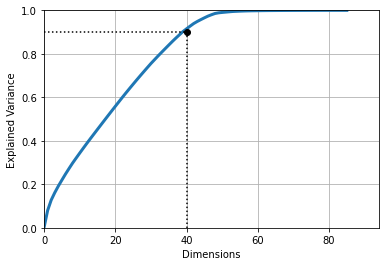

In [41]:
# plot the explained variance of each total dimension count

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 94, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")

plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

In [42]:
# Reduce the training set to the truncated dimensions

TruncSVD = TruncatedSVD(n_components=40)
X_reduced = TruncSVD.fit_transform(train_X_prepared)

## Train Model

## Bagging Classifier

In [43]:
# Train the data with Bagging classifier using optimal hyperparameters determined 
# separately using GridsearchCV on a smaller data set

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=9, max_features=8), n_estimators=141,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(X_reduced, train_y)

bag_clf.oob_score_

0.8791252239451411

In [44]:
# determine predicted y values of trained model

y_train_pred = bag_clf.predict(X_reduced)

In [45]:
# compute accuracy score comparing predicted y values to actual y values

from sklearn.metrics import accuracy_score

accuracy_score(train_y, y_train_pred)

0.8791375795391363

In [46]:
# count number of times instances are classified correctly

from sklearn.metrics import confusion_matrix

confusion_matrix(train_y, y_train_pred)

array([[71149,    11,     2],
       [ 5773,     1,     0],
       [ 3993,     3,     3]])

In [47]:
# list most important features used to make predictions

feature_importances = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.05629423020002431, 'Gender'),
 (0.053353818484475735, 'Income'),
 (0.04760103883645711, 'Cust_Segment'),
 (0.04100637710729407, 'Education_Lv'),
 (0.029763282723502246, 'Job_Status'),
 (0.029638661872050723, 'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM'),
 (0.029115777541634892, 'KOZMETİK'),
 (0.02690466708770333, 'Age'),
 (0.026541652824519608, 'Years_w_Bank'),
 (0.026527860299526695, 'Marital_Status')]

## AdaBoost

In [48]:
# Train the data with AdaBoost classifier using optimal hyperparameters determined 
# separately using GridsearchCV on a smaller data set

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1, max_features=6), n_estimators=384,
algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_reduced, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=6),
                   learning_rate=0.5, n_estimators=384)

In [49]:
# determine predicted y values of trained model

y_train_pred = ada_clf.predict(X_reduced)

In [50]:
# count number of times instances are classified correctly

confusion_matrix(train_y, y_train_pred)

array([[70794,    56,   312],
       [ 5612,    38,   124],
       [ 3574,    32,   393]])

In [51]:
# compute accuracy score comparing predicted y values to actual y values

from sklearn.metrics import accuracy_score

accuracy_score(train_y, y_train_pred)

0.8800271823067894

In [52]:
# list most important features used to make predictions

feature_importances = np.mean([tree.feature_importances_ for tree in ada_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.10677083333333333, 'Cust_Segment'),
 (0.059895833333333336, 'Branch_ID'),
 (0.046875, 'Marital_Status'),
 (0.041666666666666664, 'AKARYAKIT'),
 (0.036458333333333336, 'Education_Lv'),
 (0.033854166666666664, 'OTOMOTİV'),
 (0.033854166666666664, 'Home_Region'),
 (0.033854166666666664, 'Gender'),
 (0.03125, 'MUZIK MARKET KIRTASİYE'),
 (0.028645833333333332, 'Income')]

## Gradient Boost

In [53]:
# Train the data with GradientBoost classifier using optimal hyperparameters determined 
# separately using GridsearchCV on a smaller data set

from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gbrt = GradientBoostingClassifier(max_depth=3, max_features=5, n_estimators=306, learning_rate=0.2)
gbrt.fit(X_reduced, train_y)

GradientBoostingClassifier(learning_rate=0.2, max_features=5, n_estimators=306)

In [55]:
# determine predicted y values of trained model

y_train_pred = gbrt.predict(X_reduced)

In [56]:
# compute accuracy score comparing predicted y values to actual y values

from sklearn.metrics import accuracy_score

accuracy_score(train_y, y_train_pred)

0.8907394823006116

In [57]:
# count number of times instances are classified correctly

from sklearn.metrics import confusion_matrix

confusion_matrix(train_y, y_train_pred)

array([[70841,    62,   259],
       [ 5224,   413,   137],
       [ 3133,    28,   838]])

In [58]:
# list most important features used to make predictions

feature_importances = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.05629423020002431, 'Gender'),
 (0.053353818484475735, 'Income'),
 (0.04760103883645711, 'Cust_Segment'),
 (0.04100637710729407, 'Education_Lv'),
 (0.029763282723502246, 'Job_Status'),
 (0.029638661872050723, 'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM'),
 (0.029115777541634892, 'KOZMETİK'),
 (0.02690466708770333, 'Age'),
 (0.026541652824519608, 'Years_w_Bank'),
 (0.026527860299526695, 'Marital_Status')]

# Test data on test sets

## Bagging Test

In [59]:
# Transform the test set with the processing pipelines

test_X_prepared = full_pipeline.transform(test_X)
test_X_reduced = TruncSVD.transform(test_X_prepared)

In [60]:
# Predict the test set using the trained model, return accuracy

bag_y_pred = bag_clf.predict(test_X_reduced)
accuracy_score(test_y, bag_y_pred)

0.8792626272610458

In [61]:
# return confusion matrix

confusion_matrix(test_y, bag_y_pred)

array([[17789,     2,     0],
       [ 1443,     1,     0],
       [  996,     2,     1]])

## AdaBoost Test

In [63]:
# Predict the test set using the trained model, return accuracy

ada_y_pred = ada_clf.predict(test_X_reduced)
accuracy_score(test_y, ada_y_pred)

0.8788672531382821

In [64]:
# return confusion matrix

confusion_matrix(test_y, ada_y_pred)

array([[17694,    20,    77],
       [ 1410,     8,    26],
       [  910,     8,    81]])

## GradientBoost Test

In [66]:
# Predict the test set using the trained model, return accuracy

gbrt_y_pred = gbrt.predict(test_X_reduced)
accuracy_score(test_y, gbrt_y_pred)

0.8801027972719185

In [67]:
# return confusion matrix

confusion_matrix(test_y, gbrt_y_pred)

array([[17669,    34,    88],
       [ 1366,    24,    54],
       [  868,    16,   115]])